<a href="https://colab.research.google.com/github/mikonistealscode/dl_lab/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google.colab.patches

ERROR: Could not find a version that satisfies the requirement google.colab.patches (from versions: none)
ERROR: No matching distribution found for google.colab.patches


In [ ]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:01<00:00, 102MB/s] 


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
ADE20K_CLASS_NAMES = ["__background__",
    "wall", "building", "sky", "floor", "tree", "ceiling", "road", "bed",
    "windowpane", "grass", "cabinet", "sidewalk", "person", "earth", "door",
    "table", "mountain", "plant", "curtain", "chair", "car", "water", "painting",
    "sofa", "shelf", "house", "sea", "mirror", "rug", "field", "armchair", "nightstand",
    "barbecue", "bench", "bird", "book", "box", "bus", "bottle", "bowl", "bricks",
    "bulb", "cabinet", "canopy", "candle", "carpet", "centerpiece", "chandelier",
    "clothes", "coat", "column", "cup", "curtains", "drawer", "fence", "flowerpot",
    "food", "fountain", "frame", "fruit", "furniture", "glass", "hat", "headphones",
    "head", "keyboard", "lamp", "laptop", "leaf", "light", "mat", "microwave",
    "mirror", "mountain", "oven", "pillow", "plant", "plastic", "pole", "rack",
    "refrigerator", "rug", "scarf", "sink", "sofa", "stair", "storage", "stove",
    "table", "television", "toilet", "tower", "tree", "vase", "wall", "window"
]

In [ ]:
#C OCO dataset labels
COCO_INSTANCE_CATEGORY_NAMES = ["__background__","person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

In [ ]:
def detect_objects(image_path, confidence_threshold=0.5):
  image = cv2.imread(image_path)
  #check if the image was loaded successfully
  if image is None:
    print(f"Error loading image from {image_path}. Please check the file path and ensure the image exists.")
    return None

  original_image = image.copy()
  cv2_imshow(original_image)
  image_tensor = F.to_tensor(image)

  #Object detection
  with torch.no_grad():
    predictions = model([image_tensor])

  #Extract detected boxes, labels and scores
  boxes = predictions[0]['boxes'].cpu().numpy()
  labels = predictions[0]['labels'].cpu().numpy()
  scores = predictions[0]['scores'].cpu().numpy()

  #Draw bounding boxes
  for i, box in enumerate(boxes):
    if scores[i] >= confidence_threshold:
      label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
      score = scores[i]

      #Draw bounding box and label
      start_point = (int(box[0]), int(box[1]))
      end_point = (int(box[2]), int(box[3]))
      cv2.rectangle(original_image, start_point, end_point, (0,255,0), 2)
      cv2.putText(original_image, f"{label}: {score:.2f}", start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

  return original_image

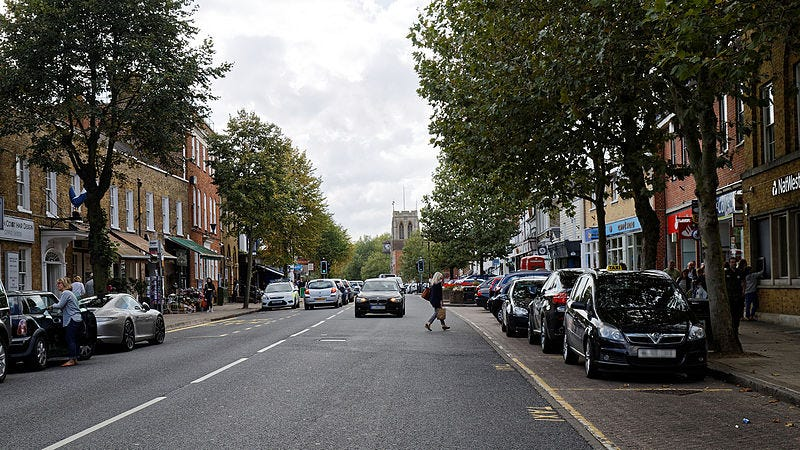

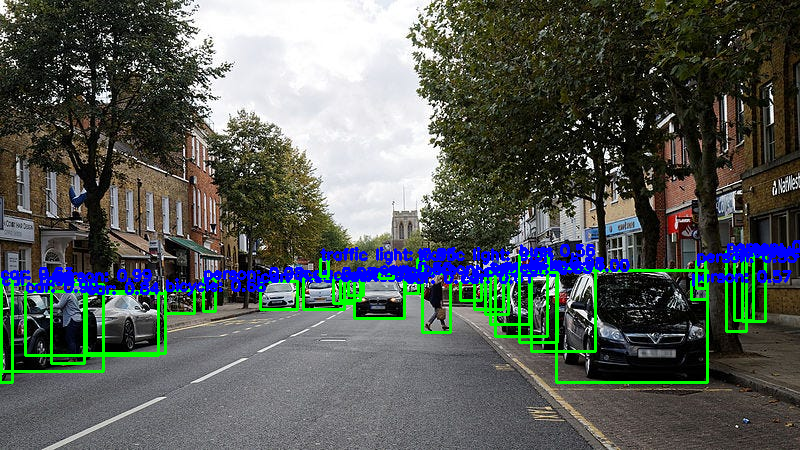

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [ ]:
if __name__ == "__main__":
  IMAGE_PATH = "/content/test.jpg"
  detected_image = detect_objects(IMAGE_PATH)

  cv2_imshow(detected_image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [ ]:
import torchvision.transforms as T

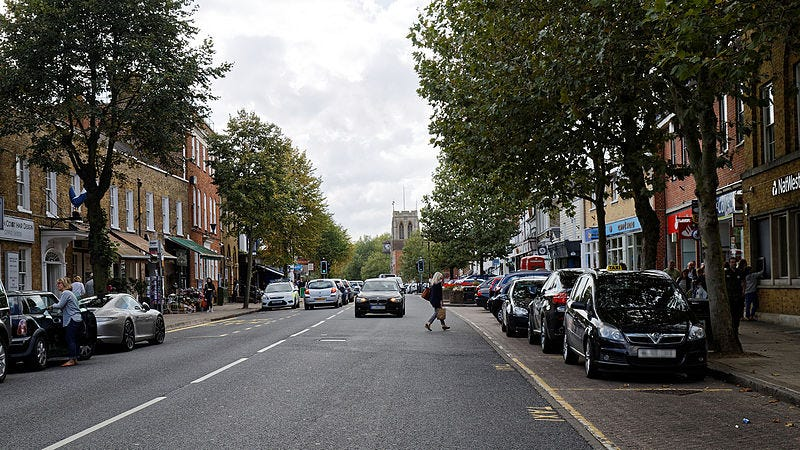

OrderedDict([('out',
              tensor([[[[ 9.9404e+00,  9.9404e+00,  9.9404e+00,  ...,  9.2430e+00,
                          9.2430e+00,  9.2430e+00],
                        [ 9.9404e+00,  9.9404e+00,  9.9404e+00,  ...,  9.2430e+00,
                          9.2430e+00,  9.2430e+00],
                        [ 9.9404e+00,  9.9404e+00,  9.9404e+00,  ...,  9.2430e+00,
                          9.2430e+00,  9.2430e+00],
                        ...,
                        [ 8.3957e+00,  8.3957e+00,  8.3957e+00,  ...,  9.4466e+00,
                          9.4466e+00,  9.4466e+00],
                        [ 8.3957e+00,  8.3957e+00,  8.3957e+00,  ...,  9.4466e+00,
                          9.4466e+00,  9.4466e+00],
                        [ 8.3957e+00,  8.3957e+00,  8.3957e+00,  ...,  9.4466e+00,
                          9.4466e+00,  9.4466e+00]],
              
                       [[-2.5367e-01, -2.5367e-01, -2.5367e-01,  ..., -1.3663e-01,
                         -1.3663e-01, -1.

In [ ]:
# def detect_objects(image_path, confidence_threshold=0.5):
confidence_threshold=0.5
if __name__ == "__main__":
  image_path = "/content/test.jpg"
  # detected_image = detect_objects(image_path)
  image = cv2.imread(image_path)
  #check if the image was loaded successfully
  if image is None:
    print(f"Error loading image from {image_path}. Please check the file path and ensure the image exists.")
    # return None

  original_image = image.copy()
  cv2_imshow(original_image)

  image_tensor = F.to_tensor(image)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to a tensor
  transform = T.Compose([T.ToTensor()])  # We only need ToTensor for this
  image_tensor = transform(image_rgb).unsqueeze(0)

  #Object detection
  with torch.no_grad():
    predictions = model(image_tensor)

  display(predictions)

  #Extract detected boxes, labels and scores
  # boxes = predictions['boxes'].cpu().numpy()
  # labels = predictions['labels'].cpu().numpy()
  # scores = predictions['scores'].cpu().numpy()

  #   #Draw bounding boxes
  # for i, box in enumerate(boxes):
  #   if scores[i] >= confidence_threshold:
  #     label = ADE20K_CLASS_NAMES[labels[i]]
  #     score = scores[i]

  #     #Draw bounding box and label
  #     start_point = (int(box[0]), int(box[1]))
  #     end_point = (int(box[2]), int(box[3]))
  #     cv2.rectangle(original_image, start_point, end_point, (0,255,0), 2)
  #     cv2.putText(original_image, f"{label}: {score:.2f}", start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

  # return original_image

In [ ]:
boxes = predictions['out'].detach().cpu().numpy()  # Extract the boxes
scores = predictions['aux'].detach().cpu().numpy()  # Extract the confidence scores

# You may need to convert the outputs from the tensor format to a usable format
# Usually the outputs are transformed from coordinates in the network space to the image space
# For simplicity, assume the outputs are ready for use as bounding boxes.

# Convert the tensor to a list of boxes (x_min, y_min, x_max, y_max) and scores
boxes = boxes.reshape(-1, 4)  # Reshaping if necessary to get the correct format
scores = scores.reshape(-1)

# Apply a threshold for confidence score (e.g., 0.5)
threshold = 0.5
indices = np.where(scores > threshold)[0]

# Filter boxes and scores based on the threshold
filtered_boxes = boxes[indices]
filtered_scores = scores[indices]

# Apply Non-Maximum Suppression (NMS) to remove duplicate boxes
# Using OpenCV's NMS implementation
indices_nms = cv2.dnn.NMSBoxes(filtered_boxes.tolist(), filtered_scores.tolist(), score_threshold=0.5, nms_threshold=0.4)

# Visualize the result using matplotlib
# Load the original image (assuming you have the image)
image = cv2.imread('image_path.jpg')  # Replace with actual image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw the boxes on the image
for i in indices_nms.flatten():
    x_min, y_min, x_max, y_max = filtered_boxes[i]
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

cv2_imshow(image)

# # Display the image with the bounding boxes
# plt.imshow(image)
# plt.axis('off')  # No axes for a clean view
# plt.show()

IndexError: index 1890681 is out of bounds for axis 0 with size 1890000